# ***Q1***

In [48]:
import torch
import matplotlib.pyplot as plt

In [49]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

b = torch.tensor([1.], requires_grad = True)
w = torch.tensor([1.], requires_grad = True)

print("The parameters are {}, and {}".format(w, b))

The parameters are tensor([1.], requires_grad=True), and tensor([1.], requires_grad=True)


The parameters are w = tensor([0.8878], requires_grad=True), b = tensor([0.9937], requires_grad=True), and losses = 10.153912544250488
The parameters are w = tensor([0.8455], requires_grad=True), b = tensor([0.9913], requires_grad=True), and losses = 1.4566774368286133
The parameters are w = tensor([0.8296], requires_grad=True), b = tensor([0.9904], requires_grad=True), and losses = 0.2217213660478592
The parameters are w = tensor([0.8236], requires_grad=True), b = tensor([0.9900], requires_grad=True), and losses = 0.04636411741375923
The parameters are w = tensor([0.8213], requires_grad=True), b = tensor([0.9899], requires_grad=True), and losses = 0.021464206278324127
The parameters are w = tensor([0.8204], requires_grad=True), b = tensor([0.9898], requires_grad=True), and losses = 0.017928214743733406
The parameters are w = tensor([0.8201], requires_grad=True), b = tensor([0.9897], requires_grad=True), and losses = 0.017425701022148132
The parameters are w = tensor([0.8200], requires

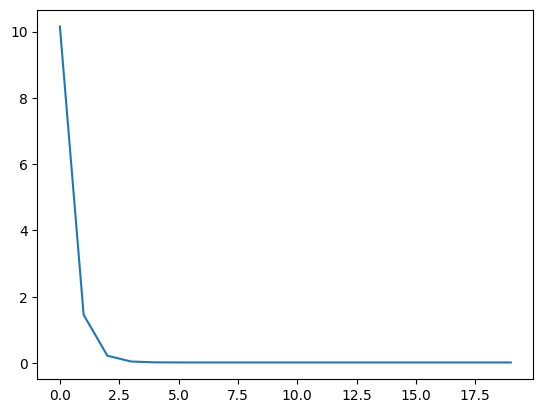

In [50]:
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(20):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j]) ** 2

    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward(retain_graph = True)

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()
    print("The parameters are w = {}, b = {}, and losses = {}".format(w, b, loss.item()))
plt.plot(loss_list)
plt.show()

# ***Q2***

The parameters are w_grad = tensor([0.]), b_grad = tensor([0.]), b = tensor([1.0520], requires_grad=True), w = tensor([1.1740], requires_grad=True), and losses = 757.0
The parameters are w_grad = tensor([0.]), b_grad = tensor([0.]), b = tensor([1.1029], requires_grad=True), w = tensor([1.3442], requires_grad=True), and losses = 724.3797607421875


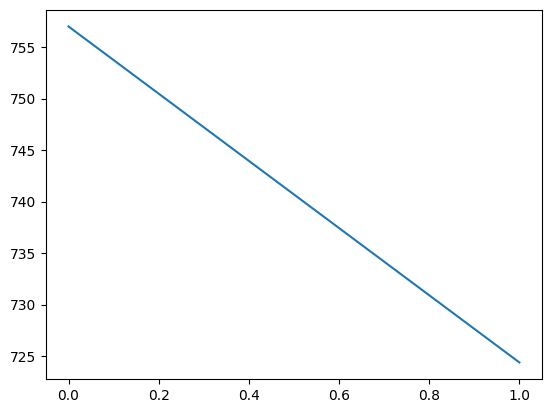

In [51]:
x = torch.tensor([2, 4])
y = torch.tensor([20, 40])

w = torch.tensor([1.], requires_grad = True)
b = torch.tensor([1.], requires_grad = True)
learning_rate = torch.tensor(0.001)

loss_list = []

for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j]) ** 2

    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward(retain_graph = True)

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()
    print("The parameters are w_grad = {}, b_grad = {}, b = {}, w = {}, and losses = {}".format(w.grad, b.grad, b, w, loss.item()))
plt.plot(loss_list)
plt.show()

# ***Q3***

The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_grad=True), and loss = 25359.80078125
The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_grad=True), and loss = 10952.734375
The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_grad=True), and loss = 4889.1201171875
The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_grad=True), and loss = 2337.07373046875
The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_grad=True), and loss = 1262.96875
The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_grad=True), and loss = 810.8944702148438
The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_grad=True), and loss = 620.6205444335938
The parameters are w = tensor([1.3442], requires_grad=True), b = tensor([1.1029], requires_gra

<function matplotlib.pyplot.show(close=None, block=None)>

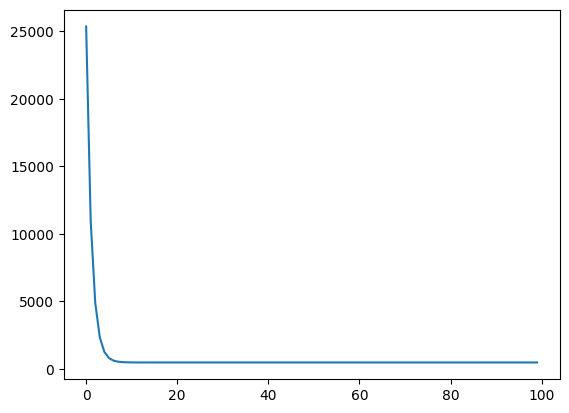

In [55]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.tensor([1.], requires_grad = True)
        self.b = torch.tensor([1.], requires_grad = True)

    def forward(self, x):
        return self.w * x + self.b

    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, yj, y_p):
        return (yj - y_p) ** 2

model = RegressionModel()

loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += model.criterion(y[j], y_p)

    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()

    with torch.no_grad():
        model.update()

    model.reset_grad()
    print("The parameters are w = {}, b = {}, and loss = {}".format(w, b, loss.item()))

plt.plot(loss_list)
plt.show

# ***Q4***

In [56]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


In [57]:
class LinearRegressionDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


In [59]:
def run(X,y,n=0.000001, e=200):
    dataset = LinearRegressionDataset(X, y)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
    model = LinearRegressionModel(input_dim=X.shape[1], output_dim=1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=n) 
    num_epochs = e
    losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(dataloader):
            inputs, labels = inputs.float(), labels.float()
            optimizer.zero_grad()
            outputs = model(inputs)
            #print(outputs)
            loss = criterion(outputs, labels)
            #print(loss)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        losses.append(running_loss / len(dataloader))
        #print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss/(i+1)))
    
    plt.figure()
    plt.plot(range(num_epochs), losses)
    plt.title("Loss per Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


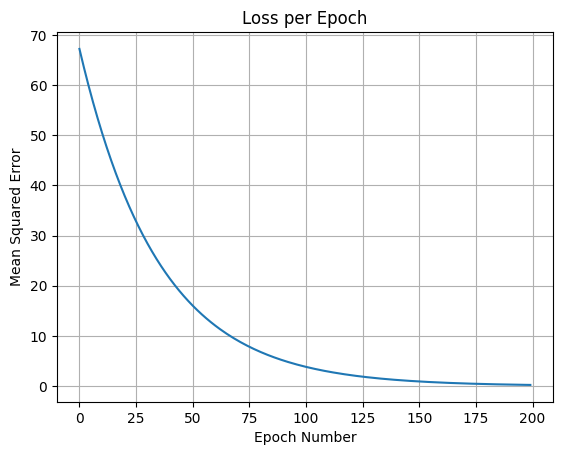

In [60]:
n = torch.tensor([.001])
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17, 17.9, 18.8, 20.3,22.4, 19.4,15.5,16.7,17.3, 18.4,19.2,17.4,19.5,19.7,21.2], requires_grad=True)
#x = torch.tensor([4., 8], requires_grad=True)
#x = torch.tensor([16., 32], requires_grad=True)
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6], requires_grad=True)
run(torch.unsqueeze(x,1),y)